# Read and plot a SWOT-HR Raster products 
*Authors: Lionel Zawadzki, CNES*

## Summary
In this notebook, we show how to read the SWOT-HR raster 100m and 250m netcdf products with xarray and how to represent a variable on a map with cartopy.

### Libraries
Please note that apart from the libraries listed in the cell below, you need to install the h5netcdf library (conda install -c conda-forge h5netcdf). This will be used by th xarray.open_dataset function to read the netcdf files.

In [1]:
import xarray as xr
import rioxarray
from pyproj import CRS
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read a SWOT-HR Raster netcdf product with xarray


In [2]:
dir_swot = "../docs/data/swot/"
file_swot_raster100 = os.path.join(
    dir_swot,
    "SWOT_L2_HR_Raster_100m",
    "SWOT_L2_HR_Raster_100m_UTM22N_N_x_x_x_015_033_082F_20240509T115817_20240509T115835_PIC0_01_extract.nc",
)
# read data with xarray
xr_swot_raster100 = xr.open_dataset(file_swot_raster100)
# force xarray to acknowledge the CRS 
xr_swot_raster100.rio.set_crs(CRS.from_user_input(xr_swot_raster100.crs.projected_crs_name).to_epsg(), inplace=True)

xr_swot_raster100

<xarray.Dataset>
Dimensions:                  (y: 75, x: 59)
Coordinates:
  * x                        (x) float64 2.712e+05 2.713e+05 ... 2.77e+05
  * y                        (y) float64 5.558e+05 5.559e+05 ... 5.632e+05
Data variables: (12/39)
    cross_track              (y, x) float32 ...
    crs                      object ...
    dark_frac                (y, x) float32 ...
    geoid                    (y, x) float32 ...
    height_cor_xover         (y, x) float32 ...
    ice_clim_flag            (y, x) float32 ...
    ...                       ...
    water_frac               (y, x) float32 ...
    water_frac_uncert        (y, x) float32 ...
    wse                      (y, x) float32 ...
    wse_qual                 (y, x) float32 ...
    wse_qual_bitwise         (y, x) float64 ...
    wse_uncert               (y, x) float32 ...
Attributes: (12/50)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       Wed Jun  5 21:08:21 2024: ncks -d x,271195...
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_max:                         315500.0
    y_min:                         497300.0
    y_max:                         643000.0
    institution:                   CNES
    product_version:               01
    NCO:                           netCDF Operators version 5.0.6 (Homepage =...

Should you want to quickly see what the data looks like, just use the following line. Lower in the notebook we will try to have something fancier.

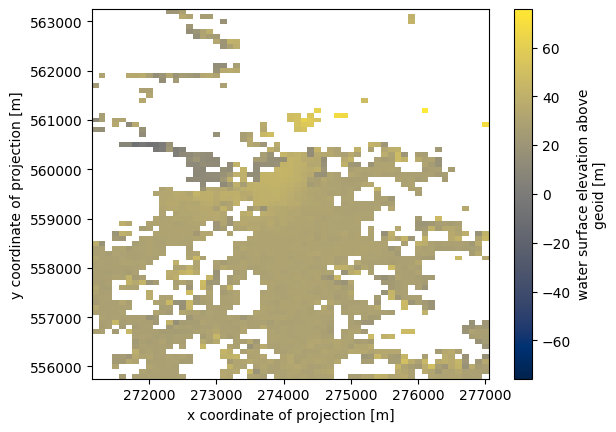

In [3]:
xr_swot_raster100.wse.plot(cmap='cividis')

### 2. Plot data on maps with cartopy

/tmp/ipykernel_25526/3469943950.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(
/tmp/ipykernel_25526/3469943950.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(


<GeoAxes: >

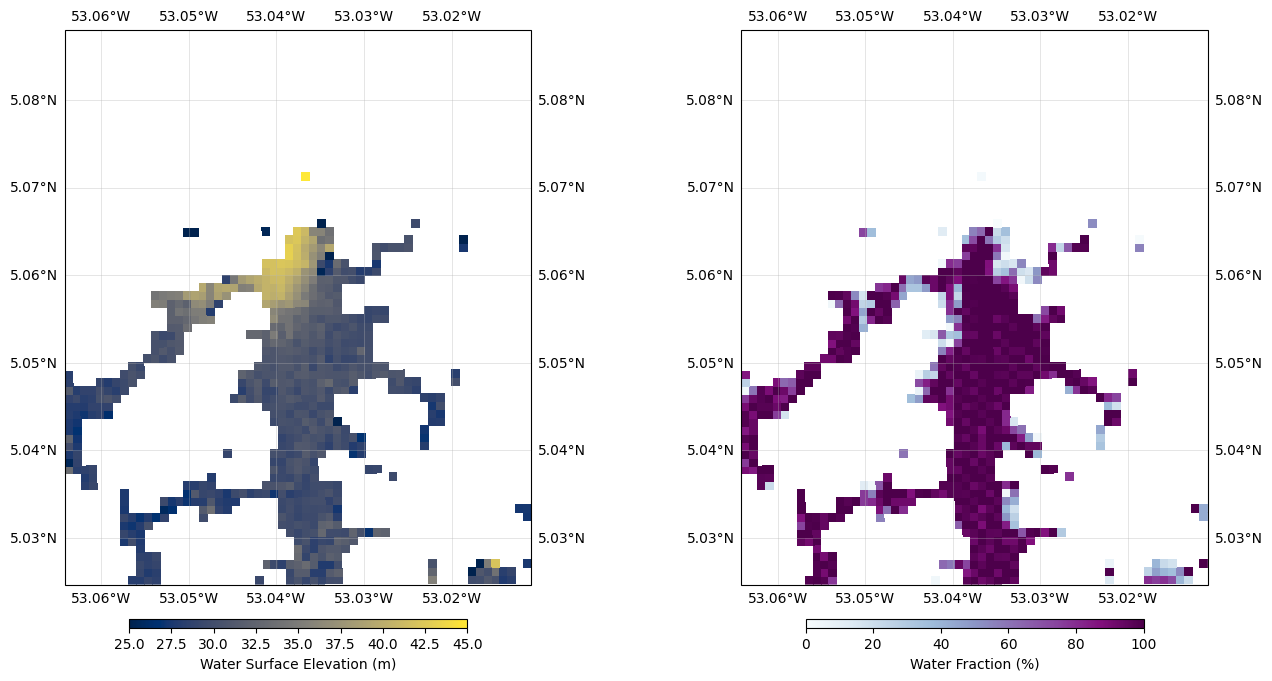

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


def customize_map(ax, cb, label, crs=ccrs.PlateCarree()):
    """This function customizes a map with projection and returns the plt.axes instance"""

    ax.gridlines(
        crs=crs,
        draw_labels=True,
        color='.7',
        alpha=.6,
        linewidth=.4,
        linestyle='-',
        )
    
    # add a background_map (default, local image, WMTS...read the doc)
    # ax.stock_img()

    # add a labeled colorbar
    plt.colorbar(
        cb,
        ax=ax,
        orientation='horizontal',
        shrink=0.6,
        pad=.05,
        aspect=40,
        label=label)

    return ax

# Create meshgrid from data
#x, y = np.meshgrid(xr_swot_raster100.longitude, xr_swot_raster100.latitude) 

# 0. Create Figure and Axes
crs = ccrs.PlateCarree()
fig, axs = plt.subplots(
    nrows=1,ncols=2,
    subplot_kw={'projection': crs},
    figsize=(16,9),
    frameon=True,
    )

# 1. plot Water Surface Elevation on map
# plot data on the map with pcolor function
cb0 = axs[0].pcolor(
    xr_swot_raster100.longitude,
    xr_swot_raster100.latitude,
    xr_swot_raster100.wse,
    transform=crs,
    cmap='cividis',
    vmin=25,
    vmax=45,
    )
# customize plot with pre-defined function
customize_map(axs[0], cb0, "Water Surface Elevation (m)")

# 2. plot Water Fraction on map
cb1 = axs[1].pcolor(
    xr_swot_raster100.longitude,
    xr_swot_raster100.latitude,
    xr_swot_raster100.water_frac*100,
    transform=crs,
    cmap='BuPu',
    vmin=0,
    vmax=100,
    )
# customize plot with pre-defined function
customize_map(axs[1], cb1, "Water Fraction (%)")
